In [1]:
from anndata import read_h5ad
import scanpy as sc
import pandas as pd

gex = read_h5ad("../data/GSE194122/gex_preprocessed.hdf5")
atac = read_h5ad("../data/GSE194122/atac_preprocessed.hdf5")
latents = pd.read_csv("../data/GSE194122/scmaui_res.csv", sep="\t", index_col=0)

gex.obsm["scmaui"] = latents
atac.obsm["scmaui"] = latents

gex

AnnData object with n_obs × n_vars = 2498 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'DonorNumber_colors', 'cell_type_colors', 'dataset_id', 'genome', 'neighbors', 'organism', 'pca', 'umap'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_umap', 'scmaui'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

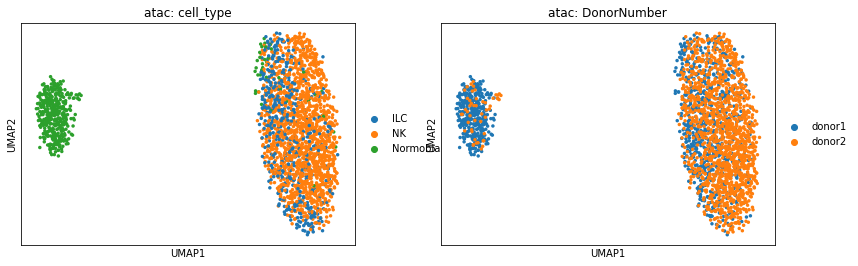

In [2]:
sc.pl.umap(atac, color=["cell_type", "DonorNumber"], 
           title=["atac: cell_type", "atac: DonorNumber"])

In [3]:
import scanpy as sc
sc.pp.neighbors(gex, use_rep="scmaui")
sc.tl.umap(gex)
sc.tl.louvain(gex, resolution=0.3, key_added="louvain")

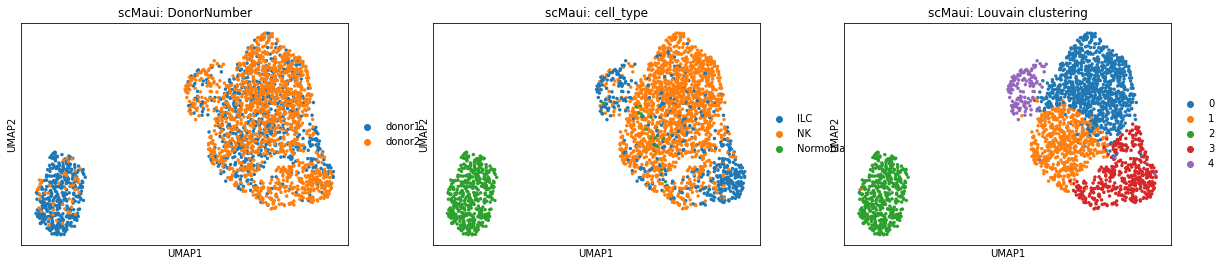

In [5]:
sc.pl.umap(gex, color=["DonorNumber", "cell_type", "louvain"], 
           title=["scMaui: DonorNumber", "scMaui: cell_type", "scMaui: Louvain clustering"])


In [21]:
from sklearn.metrics import roc_curve, auc
from scmaui.utils import compute_roc


rocs = compute_roc(gex.obsm["scmaui"], gex.obs["cell_type"])
auc_val = auc(rocs["mean"]["FPR"], rocs["mean"]["TPR"])
print(f"mean AUC: {auc_val}")


mean AUC: 0.9529526683540526


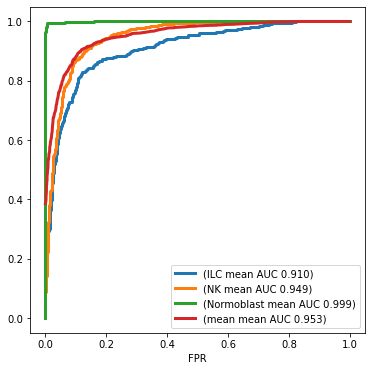

In [22]:
import matplotlib.pyplot as plt
rocs = pd.concat([rocs[k].assign(cell_type=k) for k in rocs.keys()])
fig, ax = plt.subplots(figsize=(6,6))
for c in rocs.cell_type.unique():
    auc_val =  auc(rocs.loc[rocs["cell_type"]==c]["FPR"], 
                  rocs.loc[rocs["cell_type"]==c]["TPR"])
    rocs.loc[rocs["cell_type"]==c].plot('FPR','TPR', ax = ax,
                                             lw=3, label="(%s mean AUC %.3f)"%(c, auc_val))
plt.show()

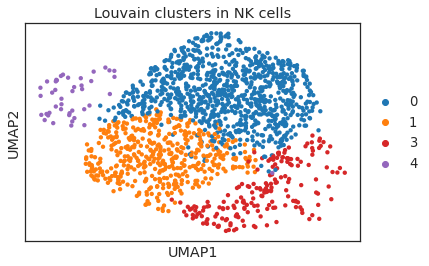

Trying to set attribute `._uns` of view, copying.


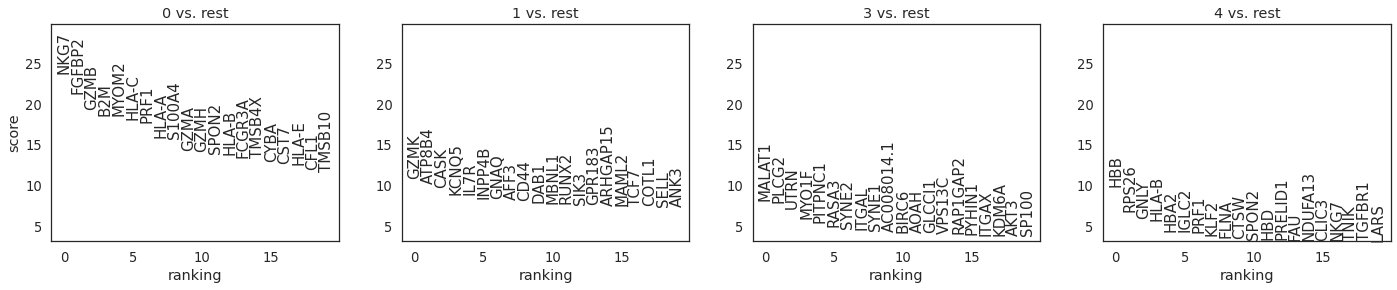

In [111]:
adata_nk = gex[gex.obs["cell_type"]=="NK"]
sc.pl.umap(adata_nk, color=["louvain"], title="Louvain clusters in NK cells")
sc.tl.rank_genes_groups(adata = adata_nk, groupby="louvain")
sc.pl.rank_genes_groups(adata = adata_nk, ncols=4, fontsize=15)

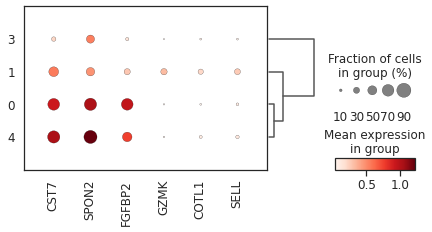

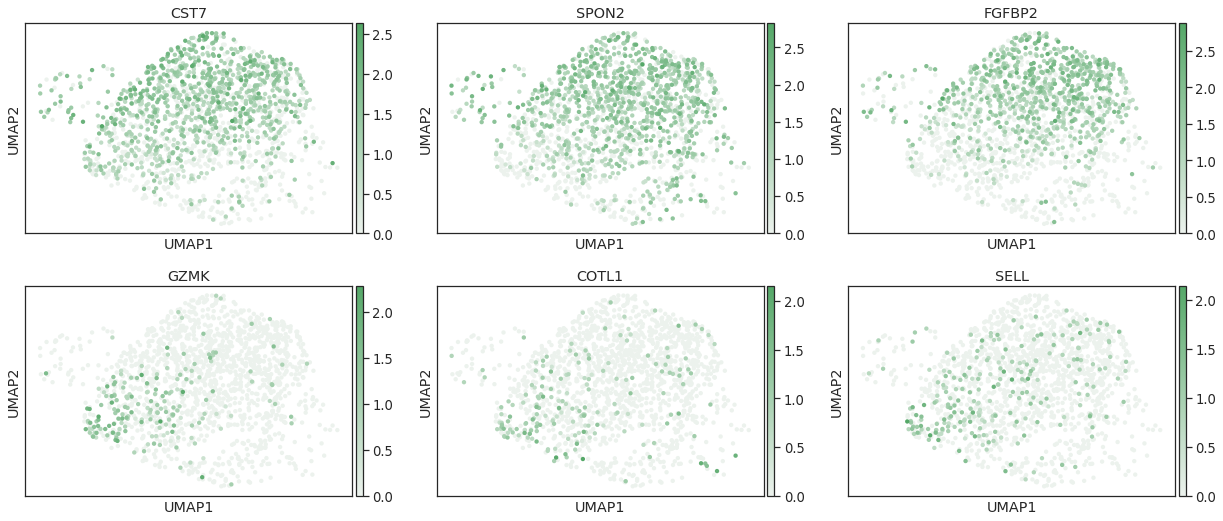

In [88]:
# https://onlinelibrary.wiley.com/doi/pdf/10.1111/jcmm.17159
sns.set(font_scale=1.2, style="white")
sc.pl.dotplot(adata = adata_nk, groupby = "louvain", 
                     var_names=["CST7", "SPON2", "FGFBP2", "GZMK", "COTL1","SELL"],
                     figsize=(7,3), dendrogram=True)
sc.pl.umap(adata_nk, color=["CST7", "SPON2", "FGFBP2", "GZMK", "COTL1","SELL"], 
           cmap=sns.color_palette("light:g", as_cmap=True), ncols=3)

/home/yuni/anaconda3/envs/scmaui/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


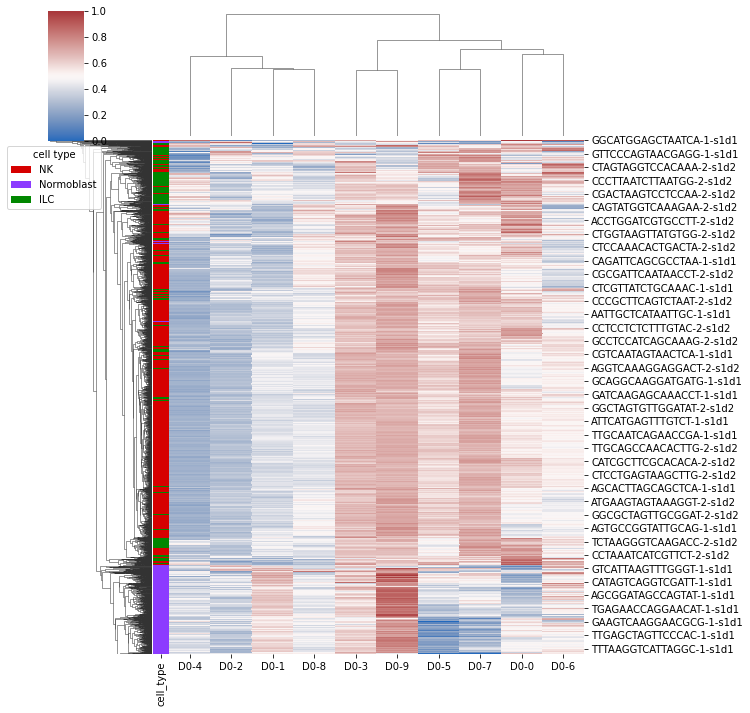

In [24]:
import seaborn as sns
import colorcet as cc
from matplotlib.patches import Patch

lut = dict(zip(gex.obs["cell_type"].unique(), sns.color_palette(cc.glasbey)))
row_colors = gex.obs["cell_type"].astype(str).map(lut)

gt_handles = [Patch(facecolor=lut[name]) for name in lut]

sns.clustermap(data=gex.obsm["scmaui"], row_colors=row_colors, row_cluster=True, cmap="vlag", standard_scale=1) 
#               standard_scale=1,metric="euclidean", cmap="vlag")
plt.legend(gt_handles, lut, title='cell type', 
           bbox_to_anchor=(0.1, 0.8), bbox_transform=plt.gcf().transFigure, loc='upper right')


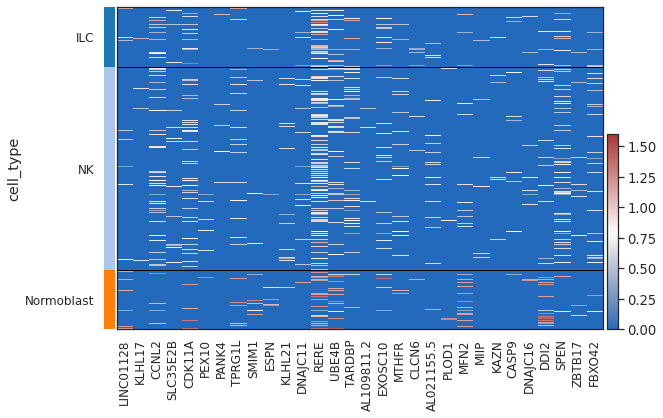

In [110]:
sc.pl.heatmap(gex, var_names=gex.var_names[gex.var["highly_variable"]][:30], log=True, 
              groupby=["cell_type"], standard_scale=0.5, cmap="vlag")

In [96]:
sc.pp.highly_variable_genes(gex)
gex

AnnData object with n_obs × n_vars = 2498 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'louvain'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'DonorNumber_colors', 'cell_type_colors', 'dataset_id', 'genome', 'neighbors', 'organism', 'pca', 'umap', 'louvain', 'louvain_colors', 'rank_genes_groups', 'hvg'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_umap', 'scmaui'
    varm: 'PCs'
    layers: 'count

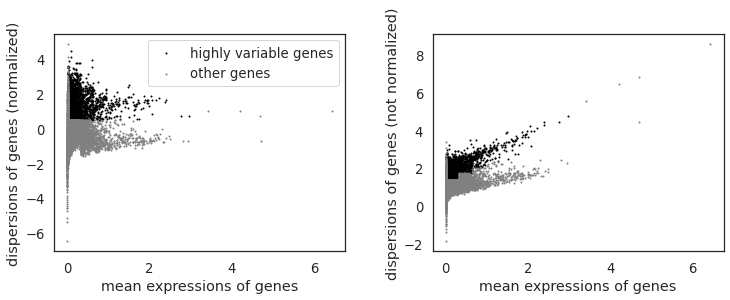

In [97]:
sc.pl.highly_variable_genes(gex)

In [101]:
gex.var_names[gex.var["highly_variable"]]

Index(['LINC01128', 'KLHL17', 'CCNL2', 'SLC35E2B', 'CDK11A', 'PEX10', 'PANK4',
       'TPRG1L', 'SMIM1', 'ESPN',
       ...
       'GDI1', 'DKC1', 'MPP1', 'FUNDC2', 'VBP1', 'CLIC2', 'VAMP7', 'MT-ATP8',
       'MT-ND4L', 'MT-ND6'],
      dtype='object', length=3290)